In [1]:
import numpy as np
import pandas as pd

In [2]:
# Please, to run the experiments donwload the following dataset and put them in the /Datasets folder:
#     - NY_train.csv - 
#       https://www.kaggle.com/c/nyc-taxi-trip-duration/data?select=train.zip
#       (extract the .csv file and rename it to NY_train.csv)

filename = "Datasets/NY_train.csv"
df = pd.read_csv(filename, header=0, usecols=[2,5,6,7,8,10])
df = df.dropna()

print(list(df.columns.values))

df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'] , errors='coerce')
df['hour'] = df.pickup_datetime.dt.hour
df['minute'] = df.pickup_datetime.dt.minute
df['pickup_mins_of_the_day'] = df['hour']*60 + df['minute']
df = df.drop(['pickup_datetime', 'hour','minute'], axis=1)
df = df.dropna()

print(df.shape)
print(df.dtypes)

['pickup_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'trip_duration']
(1458644, 6)
pickup_longitude          float64
pickup_latitude           float64
dropoff_longitude         float64
dropoff_latitude          float64
trip_duration               int64
pickup_mins_of_the_day      int64
dtype: object


In [3]:
x = df[['pickup_mins_of_the_day','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']]
x = x.to_numpy()
y = df['trip_duration']
y = y.to_numpy()

np.shape(x)

(1458644, 5)

In [4]:
import CaGD_ls

x = np.ascontiguousarray(x)
print(x.shape)
x = CaGD_ls.tens_pow(x,3) 
print(x.shape)

(1458644, 5)
(1458644, 155)


In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.999, svd_solver='full')
pca.fit(x_scaled)
x_scaled_pca = pca.transform(x_scaled)
print(np.shape(x_scaled_pca))
pca.explained_variance_ratio_.sum()

(1458644, 8)


0.9999999999999999

In [7]:
x_scaled_pca = CaGD_ls.add_bias(x_scaled_pca)
print(np.shape(x_scaled_pca))

(1458644, 9)


5237.429929188888
1458644


/Users/fcosentino/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


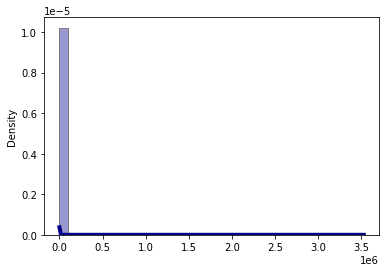

/Users/fcosentino/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


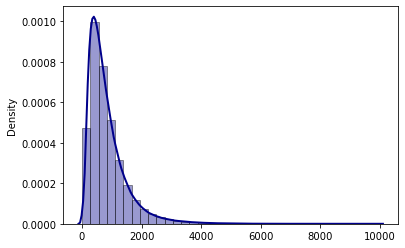

657.9589263820384
1456521


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

print(y.std())
print(len(y))
sns.distplot(y, hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.show()

idx = y<=10000
sns.distplot(y[idx], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})

plt.show()
print(y[idx].std())
print(len(y[idx]))

In [9]:
x_scaled_pca = x_scaled_pca[idx]
y = y[idx]

In [10]:
lr = 1e-3
block_dim = 2
loss_accepted = 1e-5
max_iter = 5e1
lambda_LASSO = 1e-2
batch_size = 256

n = np.shape(x_scaled_pca)[1]
print("number of parameters ", n)
print("number of points ", x_scaled_pca.shape[0])
theta_0 = np.random.uniform(-1/n**0.5,1/n**0.5,n)

number of parameters  9
number of points  1456521


In [11]:
loss_momBCD_GS,iteration_momBCD_GS,theta_momBCD_GS,t_momBCD_GS = CaGD_ls.mom_BCD_GS_ls(
                            x_scaled_pca,y,theta_0,lambda_LASSO,lr,loss_accepted,max_iter,2,0.75)

iteration =  0  | loss =  1133660.0168822673  | time =  0.008951945000035266
iteration =  1  | loss =  1133660.0269696403  | time =  0.08787877600002503
PID parallel:  23582  | process number  0
iteration =  3  | loss =  1125014.6258067465  | time =  0.44639971300000525
PID parallel:  23584  | process number  0
iteration =  5  | loss =  1106922.5957704799  | time =  0.8074074460000702
PID parallel:  23586  | process number  0
iteration =  7  | loss =  1081646.7632807621  | time =  1.1784172160000708
PID parallel:  23588  | process number  0
iteration =  9  | loss =  1051156.8076966216  | time =  1.48542167100004
PID parallel:  23590  | process number  0
iteration =  11  | loss =  1017120.8182122894  | time =  1.8561094130000129
PID parallel:  23592  | process number  0
iteration =  13  | loss =  980918.4560775352  | time =  2.2281771050001
PID parallel:  23594  | process number  0
iteration =  15  | loss =  943665.9957914175  | time =  2.5957429610000418
PID parallel:  23596  | process

In [12]:
loss_randomBCD_GS,iteration_randomBCD_GS,theta_randomBCD_GS,t_randomBCD_GS = CaGD_ls.mom_BCD_random_ls(
                            x_scaled_pca,y,theta_0,lambda_LASSO,lr,loss_accepted,max_iter,2,0.75)

iteration =  0  | loss =  1133660.0168822673  | time =  0.008476718999986588
iteration =  0  | loss =  1133660.0168822673  | time =  0.009491195000009611
PID parallel: PID parallel:  PID parallel:  23633  2363423635 | process number   | process number    | process number  0
 1
2
PID parallel: PID parallel:   2363623637PID parallel:    | process number    | process number 23638 3 
4 | process number 
 5
iteration =  6  | loss =  1130838.745021048  | time =  0.413521209999999
PID parallel:  23640 PID parallel:  | process number  PID parallel: PID parallel:  23641PID parallel:  0   
2364423643 | process number 23642     | process number  | process number 1  | process number  3 
4
2

PID parallel:  23645  | process number  5
iteration =  12  | loss =  1130639.9077137997  | time =  0.83010952799998
PID parallel:  23647  | process number  PID parallel: PID parallel: 0  
2364823649PID parallel:     | process number  | process number 23650   21
 | process number 
 PID parallel: 3 
23651  | pro

In [13]:
loss_BCD_GS,iteration_BCD_GS,theta_BCD_GS,t_BCD_GS = CaGD_ls.BCD_GS_ls(
                            x_scaled_pca,y,theta_0,lambda_LASSO,lr,loss_accepted,max_iter,2,0.75)

iteration =  0  | loss =  1133660.0168822673  | time =  0.008656704000031823
iteration =  1  | loss =  1133660.0269696403  | time =  0.10718629900009091
PID parallel:  23696  | process number  0
iteration =  3  | loss =  1127687.4170788538  | time =  0.4641626710000537
PID parallel:  23698  | process number  0
iteration =  5  | loss =  1121763.6162277954  | time =  0.8376116890000276
PID parallel:  23700  | process number  0
iteration =  7  | loss =  1115888.183394566  | time =  1.2154050430000325
PID parallel:  23702  | process number  0
iteration =  9  | loss =  1110060.7163163964  | time =  1.5822695210000575
PID parallel:  23704  | process number  0
iteration =  11  | loss =  1104280.8196137615  | time =  1.9640512840001065
PID parallel:  23706  | process number  0
iteration =  13  | loss =  1098548.1012064575  | time =  2.3297467320001033
PID parallel:  23708  | process number  0
iteration =  15  | loss =  1092862.1722854641  | time =  2.7093393890000925
PID parallel:  23710  | pr

In [14]:
loss_momCA_GS,iteration_momCA_GS,theta_momCA_GS,t_momCA_GS = CaGD_ls.mom_CA_BCD_GS_ls(
                            x_scaled_pca,y,theta_0,lambda_LASSO,lr,loss_accepted,max_iter,2,0.75)

iteration =  0  | loss =  1133660.0168822673  | time =  0.009498032000010426
iteration =  2  | loss =  1130656.8692568368  | time =  0.27945826699999543
PID parallel:  23746  | process number  0  | iterations CA =  33
iteration =  4  | loss =  608741.3294869227  | time =  0.9428073289999475
PID parallel:  23748  | process number  0  | iterations CA =  100
iteration =  6  | loss =  402348.91075146873  | time =  1.658273773000019
PID parallel:  23750  | process number  0  | iterations CA =  9
PID parallel:  23751  | process number  1  | iterations CA =  18
iteration =  8  | loss =  400199.89890522626  | time =  2.446366664999914
PID parallel:  23753  | process number  0  | iterations CA =  14
PID parallel:  23754  | process number  1  | iterations CA =  27
iteration =  10  | loss =  398201.8561528757  | time =  3.2277333429999544
PID parallel:  23756  | process number  0  | iterations CA =  100
PID parallel:  23757  | process number  1  | iterations CA =  10
iteration =  12  | loss =  39

In [15]:
loss_momCA_random,iteration_momCA_random,theta_momCA_random,t_momCA_random = CaGD_ls.mom_CA_BCD_random_ls(
                            x_scaled_pca,y,theta_0,lambda_LASSO,lr,loss_accepted,max_iter,2,0.5)

iteration =  0  | loss =  1133660.0168822673  | time =  0.009946550999984538
iteration =  2  | loss =  1130857.313791695  | time =  0.17600064499993096
PID parallel:  23817  | process number PID parallel:   238180   | iterations CA =  | process number   1001
  | iterations CA =  100
iteration =  4  | loss =  437543.3290285062  | time =  0.7278699080000024
PID parallel:  23820 PID parallel:  | process number   238210   | process number  | iterations CA =   301
  | iterations CA =  6
iteration =  6  | loss =  434699.8776302954  | time =  1.27299609399995
PID parallel:  PID parallel:  23824 23823  | process number   | process number  10   | iterations CA =   | iterations CA =  2320

iteration =  8  | loss =  429990.56502991176  | time =  1.8036657000000105
PID parallel:  23826  | process number  0 PID parallel:  | iterations CA =   2382731 
 | process number  1  | iterations CA =  6
iteration =  10  | loss =  402822.78532010375  | time =  2.3411938519999467
PID parallel:  23829PID paralle

In [16]:
loss_CABCD_stand_GS,iteration_CABCD_stand_GS,theta_CABCD_stand_GS,t_CABCD_stand_GS = CaGD_ls.CA_BCD_GS_ls(
                             x_scaled_pca,y,theta_0,lambda_LASSO,lr,loss_accepted,max_iter,2,0.75)

iteration =  0  | loss =  1133660.0168822673  | time =  0.009656780000000253
iteration =  2  | loss =  1130656.8692568368  | time =  0.23890483499997117
PID parallel:  23894  | process number  0  | iterations CA =  100
iteration =  4  | loss =  883023.2331084061  | time =  0.8448275240000385
PID parallel:  23896  | process number  0  | iterations CA =  100
iteration =  6  | loss =  719829.0204077221  | time =  1.4772450130000152
PID parallel:  23898  | process number  0  | iterations CA =  100
iteration =  8  | loss =  612100.3145253916  | time =  2.1322627890000376
PID parallel:  23900  | process number  0  | iterations CA =  100
iteration =  10  | loss =  541303.4357028885  | time =  2.79358210700002
PID parallel:  23902  | process number  0  | iterations CA =  100
iteration =  12  | loss =  494245.15290719783  | time =  3.447928970000021
PID parallel:  23904  | process number  0  | iterations CA =  100
iteration =  14  | loss =  461991.21836348233  | time =  4.11923514700004
PID par

In [17]:
loss_ADAM,iteration_ADAM,theta_ADAM,t_ADAM = CaGD_ls.ADAM_ls(x_scaled_pca,y,theta_0,lambda_LASSO,batch_size,lr,loss_accepted,max_iter)

iteration =  0  | loss =  1133660.0168822673  | time =  0.009754057000009198
iteration =  1  | loss =  1122055.3139264677  | time =  0.4066320189999715
iteration =  2  | loss =  1110772.9891279992  | time =  0.7914480270000013
iteration =  3  | loss =  1099822.6125033488  | time =  1.1722247940000443
iteration =  4  | loss =  1089092.4713368919  | time =  1.55063154700008
iteration =  5  | loss =  1078566.907011908  | time =  1.9268887460000315
iteration =  6  | loss =  1068312.938477343  | time =  2.310819305999985
iteration =  7  | loss =  1058247.2093008626  | time =  2.6889551400000755
iteration =  8  | loss =  1048166.0379781998  | time =  3.070968549999975
iteration =  9  | loss =  1038454.9143707625  | time =  3.448830686000065
iteration =  10  | loss =  1028858.7194385142  | time =  3.828258384000037
iteration =  11  | loss =  1019334.4061838727  | time =  4.210787766000067
iteration =  12  | loss =  1009874.7161771177  | time =  4.5924887350000745
iteration =  13  | loss =  10

In [18]:
lr = 1e-6
loss_SAG,iteration_SAG,theta_SAG,t_SAG = CaGD_ls.SAG_ls(x_scaled_pca,y,theta_0,lambda_LASSO,batch_size,lr,loss_accepted,max_iter)

iteration =  0  | loss =  1133660.0168822673  | time =  0.045426958999996714
iteration =  1  | loss =  1116707.5255911783  | time =  0.6187485489999744
iteration =  2  | loss =  1100083.447963294  | time =  1.3729747209999914
iteration =  3  | loss =  1083846.349964911  | time =  2.1374380599999085
iteration =  4  | loss =  1067986.6598624305  | time =  2.9018200849999403
iteration =  5  | loss =  1052495.111981658  | time =  3.668328914999961
iteration =  6  | loss =  1037364.1992622461  | time =  4.416854892999936
iteration =  7  | loss =  1022584.9413882627  | time =  5.152716366999925
iteration =  8  | loss =  1008146.8257271774  | time =  5.900662613000009
iteration =  9  | loss =  994046.2205752968  | time =  6.694402104999995
iteration =  10  | loss =  980272.8224443722  | time =  7.4600920679999945
iteration =  11  | loss =  966818.459950109  | time =  8.224653353999997
iteration =  12  | loss =  953677.4562840291  | time =  8.986474254999962
iteration =  13  | loss =  940841.1

In [19]:
print("loss min mom GS CA = ", min(loss_momCA_GS))
print("loss min mom random CA = ", min(loss_momCA_random))
print("loss min standard GS CA = ", min(loss_CABCD_stand_GS))
print("loss min ADAM = ", min(loss_ADAM))
print("loss min SAG = ", min(loss_SAG))

loss min mom GS CA =  394018.85254494334
loss min mom random CA =  394380.4294086776
loss min standard GS CA =  394943.3197608981
loss min ADAM =  707321.4745911083
loss min SAG =  621477.3488950098


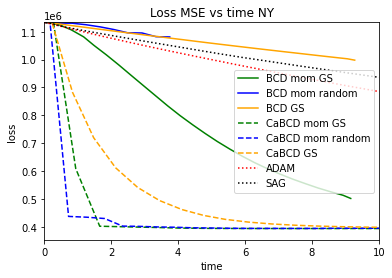

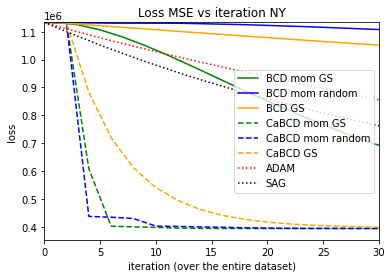

In [21]:
from matplotlib import pyplot as plt

plt.plot(t_momBCD_GS, loss_momBCD_GS, label="BCD mom GS", color='green')
plt.plot(t_randomBCD_GS, loss_randomBCD_GS, label="BCD mom random", color='blue')
plt.plot(t_BCD_GS, loss_BCD_GS, label="BCD GS", color='orange')
plt.plot(t_momCA_GS, loss_momCA_GS, label="CaBCD mom GS", linestyle='--', color='green')
plt.plot(t_momCA_random, loss_momCA_random, label="CaBCD mom random", linestyle='--', color='blue')
plt.plot(t_CABCD_stand_GS, loss_CABCD_stand_GS, label="CaBCD GS", linestyle='--', color='orange')
plt.plot(t_ADAM, loss_ADAM, label="ADAM", linestyle=':', color='red')
plt.plot(t_SAG, loss_SAG, label="SAG", linestyle=':', color='black')
plt.legend(loc = "right")
plt.title('Loss MSE vs time NY')
plt.xlabel('time')
plt.ylabel('loss')

plt.xlim([0,10])
plt.ylim([min(loss_ADAM)*0.5,max(loss_ADAM)])
# plt.savefig('CaBCD_vs_all_time_NY.pdf', bbox_inches='tight')
plt.show()

plt.plot(iteration_momBCD_GS, loss_momBCD_GS, label="BCD mom GS", color='green')
plt.plot(iteration_randomBCD_GS, loss_randomBCD_GS, label="BCD mom random", color='blue')
plt.plot(iteration_BCD_GS, loss_BCD_GS, label="BCD GS", color='orange')
plt.plot(iteration_momCA_GS, loss_momCA_GS, label="CaBCD mom GS", linestyle='--', color='green')
plt.plot(iteration_momCA_random, loss_momCA_random, label="CaBCD mom random", linestyle='--', color='blue')
plt.plot(iteration_CABCD_stand_GS, loss_CABCD_stand_GS, label="CaBCD GS", linestyle='--', color='orange')
plt.plot(iteration_ADAM, loss_ADAM, label="ADAM", linestyle=':', color='red')
plt.plot(iteration_SAG, loss_SAG, label="SAG", linestyle=':', color='black')
plt.legend(loc = "right")
plt.title('Loss MSE vs iteration NY')
plt.xlabel('iteration (over the entire dataset)')
plt.ylabel('loss')
plt.xlim([0,30])
plt.ylim([min(loss_ADAM)*0.5,max(loss_ADAM)])
# plt.savefig('CaBCD_vs_all_iteration_NY.pdf', bbox_inches='tight')
plt.show()